In [1]:
import pandas as pd

df = pd.read_csv('data6-3-2.csv')

In [ ]:
from statsmodels.formula.api import ols # 다중선형회귀 모델(ols)

formula = 'temperature ~ solar + wind + o3'

model = ols(formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            temperature   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     1.464
Date:                Wed, 26 Nov 2025   Prob (F-statistic):              0.229
Time:                        13:56:07   Log-Likelihood:                -195.45
No. Observations:                 100   AIC:                             398.9
Df Residuals:                      96   BIC:                             409.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.0507      1.994      9.555      0.000      15.093      23.008
solar          0.0039      0.015      0.251      0.802      -0.027       0.035
wind          -0.0252      0.090     -0.280      0.780      -0.204       0.153
o3             0.0749      0.036      2.079      0.040       0.003       0.146
==============================================================================
Omnibus:                        0.654   Durbin-Watson:                   2.328
Prob(Omnibus):                  0.721   Jarque-Bera (JB):                0.672
Skew:                           0.187   Prob(JB):                        0.715
Kurtosis:                       2.855   Cond. No.                     1.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
new_data = pd.DataFrame({
    'solar':[100],
    'wind':[5],
    'o3':[30]
})

pred = model.get_prediction(new_data)
pred.summary_frame(alpha=0.05) # 신뢰구간 95%

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,21.56163,0.175263,21.213737,21.909524,18.082985,25.040276


In [16]:
import pandas as pd

df = pd.read_csv('clam.csv')
df

,age,length,diameter,height,weight,gender
0,6,0.474627,0.211352,0.178189,78.971766,1
1,1,0.465847,0.339388,0.170522,98.781960,1
2,4,0.122807,0.238691,0.106924,88.792625,0
3,4,0.204579,0.360543,0.034261,1.028847,0
4,8,0.243458,0.358037,0.128080,6.503367,0
...,...,...,...,...,...,...
295,3,0.559766,0.390519,0.079062,57.877344,0
296,8,0.371229,0.355306,0.040285,31.909257,1
297,2,0.595571,0.104829,0.132500,4.924550,1
298,7,0.291551,0.289444,0.073238,51.474851,0


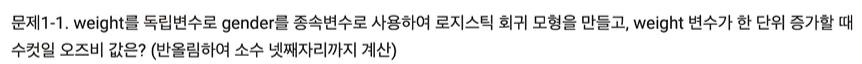

In [17]:
train = df.iloc[:210]
test = df.iloc[210:]

train.shape, test.shape

((210, 6), (90, 6))

In [ ]:
from statsmodels.formula.api import logit # 로지스틱 회귀
import numpy as np

# 종속(y) ~ 독립(x)
model = logit('gender ~ weight', data=train).fit()
print(model.summary())

print(round(np.exp(0.0047), 4))

Optimization terminated successfully.
         Current function value: 0.690045
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                 gender   No. Observations:                  210
Model:                          Logit   Df Residuals:                      208
Method:                           MLE   Df Model:                            1
Date:                Wed, 26 Nov 2025   Pseudo R-squ.:                0.003431
Time:                        17:48:37   Log-Likelihood:                -144.91
converged:                       True   LL-Null:                       -145.41
Covariance Type:            nonrobust   LLR p-value:                    0.3178
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3140      0.276     -1.137      0.256      -0.855       0.227
weight         0.0047      0.

In [18]:
model = logit('gender ~ weight', data=train).fit()
target = test.pop('gender')
pred = model.predict(test) > 0.5

Optimization terminated successfully.
         Current function value: 0.690045
         Iterations 4


In [19]:
import pandas as pd

df = pd.read_csv('system.csv')
df

,ERP,Feature1,Feature2,Feature3,CPU
0,135.281047,235.088034,44.462272,-36.532634,20.492369
1,108.003144,36.571914,46.409312,-21.709347,34.169811
2,119.574760,52.239055,66.494894,-30.590820,67.624248
3,144.817864,196.195890,59.828956,-33.400891,87.923476
4,137.351160,75.175619,59.601973,-26.668085,54.367805
...,...,...,...,...,...
95,114.131463,105.039508,67.053370,-33.807461,33.747738
96,100.210000,141.114900,51.465875,-25.710380,97.049369
97,135.717410,179.363130,58.744305,-24.294491,13.343943
98,102.538242,217.189747,44.008265,-22.667106,9.680395


In [20]:
cond = df['CPU'] < 100
df = df[cond]

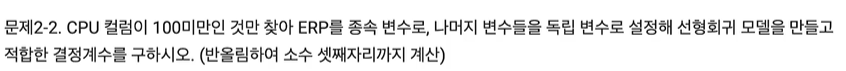

In [ ]:
from statsmodels.formula.api import ols # 선형 회귀 > 결정계수(R-squared)

model = ols('ERP ~ Feature1 + Feature2 + Feature3 + CPU', data=df).fit()
print(model.summary())
# 0.226

                            OLS Regression Results                            
Dep. Variable:                    ERP   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     6.937
Date:                Wed, 26 Nov 2025   Prob (F-statistic):           6.07e-05
Time:                        18:01:11   Log-Likelihood:                -429.44
No. Observations:                 100   AIC:                             868.9
Df Residuals:                      95   BIC:                             881.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     74.4348     15.094      4.932      0.0